In [16]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *

import CNN_reg as CNNr

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CNN Reg

Use a simple convolutional neural network whose architecture is similar to the classical LeNet. Regularization has been added

In [69]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [80]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val,all_classified,misclassified  = CNNr.train_all(train_input, train_target, 
                                                                                            train_classes,val_input,
                                                                                            val_target, val_classes, 
                                                                                            test_input, test_target, test_classes,nround=35)

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.988 
Validation accuracy is 0.81 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.988 
Validation accuracy is 0.778 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.96 
Validation accuracy is 0.8 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.964 
Validation accuracy is 0.808 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.968 
Validation accuracy is 0.794 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.971 
Validation accuracy is 0.796 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.982 
Validation accuracy is 0.8 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.974 
Validation accuracy 

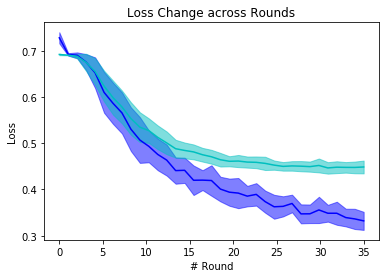

In [81]:
plt.figure()
plotloss((losses/(train_input.size(0)/mini_batch_size)).T,color= 'b')
plotloss(losses_val.T,color= 'c')

plt.show()

### Evaluation of model performance

In [82]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9774 ± 0.0001 


In [83]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

The test accuracy of the model is 0.7945 ± 0.0001 


In [84]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8101 ± 0.0001 


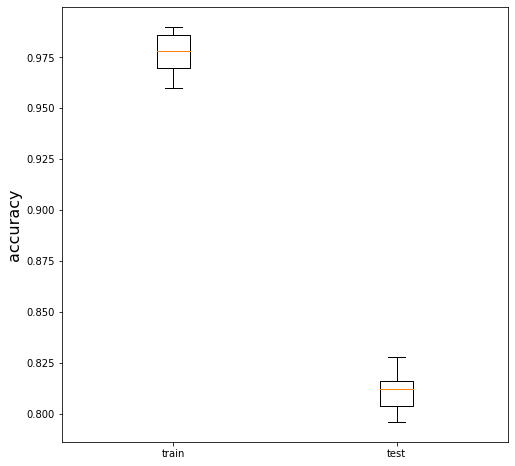

In [85]:
plot_performance(accuracies_train,accuracies_test)

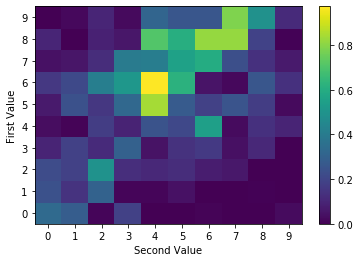

In [86]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
heat_map = plot_heatmap(misclassified,all_classified)

In [87]:
import pickle
with open(f'produced/CNN_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)

In [88]:
with open(f'produced/CNN_heatmap.p', 'wb') as f:
    pickle.dump(heat_map ,f)